In [278]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

from PIL import Image

import sys
sys.path.append('../Pyfiles')
# Pull in the helper files.
from ImageRead import *

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *


In [279]:

def arraytoTensor(data):
    tensor=transforms.ToTensor()(data).unsqueeze_(0);
    return tensor

def datasetGen(dataInput,dataTarget):
    train_data = []
    for i in range(len(dataInput)):
        train_data.append([dataInput[i], dataTarget[i]])
    trainloader = torch.utils.data.DataLoader(train_data, shuffle=True)        
    return trainloader

In [387]:
pathY=r'..\\dataset\\Original\\storm\\'
pathN=r'..\\dataset\\Original\\No-storm\\'
nameN='no_storm'
nameY='storm'
inputY=[arraytoTensor(imageResize(callImage(i+1,pathY,nameY),128) )for i in range(15)]
inputN=[arraytoTensor(imageResize(callImage(i+1,pathN,nameN),128)) for i in range(15)]

inputY_Tensor=torch.stack(inputY)
inputN_Tensor=torch.stack(inputN)
input_comb = torch.cat([inputY_Tensor,inputN_Tensor])

targetY = torch.Tensor([0]).repeat(15);
targetN = torch.Tensor([1]).repeat(15);
target_comb = torch.cat([targetY,targetN]);


idx=torch.randperm(30)

dataInput = input_comb[idx]
dataTarget = target_comb[idx]

trainloader=datasetGen(dataInput,dataTarget)


inputY=[arraytoTensor(imageResize(callImage(i+1+15,pathY,nameY),128) )for i in range(10)]
inputN=[arraytoTensor(imageResize(callImage(i+1+15,pathN,nameN),128)) for i in range(10)]

inputY_Tensor=torch.stack(inputY)
inputN_Tensor=torch.stack(inputN)
input_comb = torch.cat([inputY_Tensor,inputN_Tensor])

targetY = torch.Tensor([0]).repeat(10);
targetN = torch.Tensor([1]).repeat(10);
target_comb = torch.cat([targetY,targetN]);


idx=torch.randperm(20)

dataInput = input_comb[idx]
dataTarget = target_comb[idx]

testloader=datasetGen(dataInput,dataTarget)

classes = ('storm', 'nostorm')


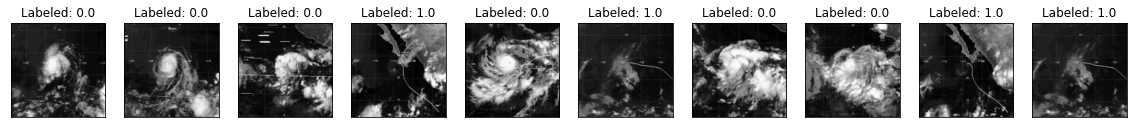

In [398]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

# get some random training images

n_samples_show = 10

data_iter = iter(trainloader)

fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(20, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1


In [408]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(13456 , 64)
        self.fc2 = nn.Linear(64, 1)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(1, -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return torch.cat((x, 1 - x), -1)

In [412]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(trainloader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data.squeeze(0))
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())
    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

C:\Users\Saesun Kim\anaconda3\envs\qiskit\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x13456 and 256x64)

In [403]:
print('Traning Start')
for epoch in range(1000):  # loop over the dataset multiple times
    
    for ix in range(num_data):
        running_loss = 0.0

        # get the inputs; data is a list of [inputs, labels]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs[ix])[0]

        loss = criterion(outputs,labels[ix])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    print(epoch,"iteration L= ",running_loss);

print('Finished Training')

Traning Start


NotImplementedError: 

In [ ]:
outputs = net(inputs[0])[0]
train_acc = torch.sum(torch.round(torch.flatten(outputs)) == labels)/(num)
print("Training Accuracy =",np.round(np.array(train_acc),2))

In [ ]:
net(inputs[0])